# DAT561 Final Project 

### Group Member: 502452, 499965, 499900

#### NOTE: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.

In [3]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [4]:
#read the dataset here
Property_details = pd.read_csv("Property_details.csv") # Please use your path and dataset for this parts!
Order_details = pd.read_csv("Order_details.csv",encoding='latin-1')

## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [5]:
#(1a)
Property_details.loc[Property_details["zipcode"] == 84100].shape[0]

52

In [6]:
#(1b)
result = Property_details.loc[Property_details["zipcode"] == 84100,"starrating"].describe()
mean = result[1]
std = result[2]
median = result[5]
minimum = result[3]
maximum = result[-1]

mean, std, median, minimum, maximum

(2.8461538461538463, 0.7510676161988106, 3.0, 2.0, 4.0)

## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [7]:
#(2a)
#Method1
def weekday(x):
    x = x.split("/")
    temp = pd.Timestamp("%d-%d-%d" % (int(x[-1]), int(x[0]), int(x[1]))).day_name()
    return temp
    
Order_details["weekday"] = Order_details["reservation date"].apply(weekday)
Order_details.head(2)

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday


In [8]:
# Method 2
# from datetime import datetime
# days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# Order_details["weekday"]=Order_details["reservation date"].apply(lambda x: days[datetime.strptime(x,"%m/%d/%Y").weekday()])
# Order_details.head()

In [9]:
# Method 3
# order_df = pd.read_csv("Order_details.csv")

# order_df['reservation date'] = pd.to_datetime(order_df['reservation date'])
# order_df['num_weekday'] = order_df.iloc[:,3].dt.weekday
# weekday_list = []
# for row in order_df['num_weekday']:
#     if row == 0:
#         row = 'Monday'
#     elif row == 1:
#         row = 'Tuesday'
#     elif row == 2:
#         row = 'Wednesday'
#     elif row == 3:
#         row = 'Thursday'
#     elif row == 4:
#         row = 'Friday'
#     elif row == 5:
#         row = 'Saturday'
#     elif row == 6:
#         row = 'Sunday'
#     weekday_list.append(row)

# order_df['weekday'] = weekday_list
# order_df

In [10]:
#(2b)
# Method 1
prob2 = pd.DataFrame(Order_details.groupby("weekday").id.count()\
          .sort_values(ascending = False)).reset_index()
prob2.loc[0,"weekday"]

'Thursday'

In [11]:
# Method 2
# Order_details["weekday"].describe()

## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [12]:
# You can deceide whether to display you output for 3(a) and 3(b) separately or together
# Order_details.columns.values.tolist()
temp = Order_details.roomamenities.dropna(axis = 0)
amen_count = {}
for line in temp:
    line = line.split(";")
    for item in line:
        item = item.strip("!: ")
        if item not in amen_count.keys() and len(item) >= 2:
            amen_count[item] = 1
        elif item in amen_count.keys() and len(item) >= 2:
            amen_count[item] += 1

top_10=sorted(amen_count.items(),key=lambda item:item[1],reverse=True)[:10]
least_10=sorted(amen_count.items(),key=lambda item:item[1])[:10]        

print("Top 10 Amenities: ", top_10,"\n")
print("Last 10 Amenities: ", least_10)

Top 10 Amenities:  [('Air conditioning', 161054), ('In-room safe box', 161054), ('Free Wi-Fi in all rooms', 157613), ('Hair dryer', 127316), ('Toiletries', 119993), ('Heating', 119196), ('Desk', 114593), ('Telephone', 113827), ('Closet', 113368), ('Towels', 106225)] 

Last 10 Amenities:  [('Open air bath privileges', 12), ('Hot tub', 13), ('Vending machine', 24), ('Humidifier', 45), ('TV [in bathroom]', 58), ('Internet access ï¿?LAN', 72), ('First aid kit', 98), ('Air purifier', 103), ('In-room tablet', 161), ('Wi-Fi [free]', 196)]


In [13]:
# If you displayed your output of 3(b) together with 3(a) please delete this chunk
amen_perct = {}
for item in amen_count.keys():
    amen_perct[item] = amen_count[item] / Order_details.id.count()

for v,k in amen_perct.items():
    perct = k * 100
    print("Amenity: ",v,"\t", "Total Percent: ", "%f" %perct+"%")

Amenity:  Air conditioning 	 Total Percent:  97.094765%
Amenity:  Alarm clock 	 Total Percent:  24.088309%
Amenity:  Carpeting 	 Total Percent:  42.917774%
Amenity:  Closet 	 Total Percent:  68.346265%
Amenity:  Coffee/tea maker 	 Total Percent:  47.374799%
Amenity:  Desk 	 Total Percent:  69.084782%
Amenity:  DVD/CD player 	 Total Percent:  4.058527%
Amenity:  Fan 	 Total Percent:  12.297360%
Amenity:  Free Wi-Fi in all rooms 	 Total Percent:  95.020287%
Amenity:  Hair dryer 	 Total Percent:  76.755108%
Amenity:  Heating 	 Total Percent:  71.859796%
Amenity:  In-room safe box 	 Total Percent:  97.094765%
Amenity:  Ironing facilities 	 Total Percent:  41.584224%
Amenity:  Linens 	 Total Percent:  46.733344%
Amenity:  Mini bar 	 Total Percent:  31.153955%
Amenity:  Seating area 	 Total Percent:  25.572577%
Amenity:  Toiletries 	 Total Percent:  72.340284%
Amenity:  Towels 	 Total Percent:  64.039958%
Amenity:  TV [flat screen] 	 Total Percent:  16.884604%
Amenity:  Fireplace 	 Total Per

## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [14]:
#4(a)
median = Order_details.loc[Order_details.onsiteprice != 0, "onsiteprice"].median()
Order_details["replaced_onsiteprice"] = Order_details.onsiteprice.\
                                        apply(lambda x: x if x >0 else median)
Order_details.head(2)

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced_onsiteprice
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday,82.36
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday,636.09


In [15]:
#4(b)
from pandasql import sqldf

Order_details_1 = sqldf("select propertycode as hotelcode,\
                    max(replaced_onsiteprice) as Maximum, min(replaced_onsiteprice) as Minimum\
                    from Order_details \
                    group by propertycode")

prob4b = sqldf("SELECT hotelcode, Maximum, Minimum,\
               (Maximum - (select min(Maximum) from Order_details_1))/\
               ((select max(Maximum) from Order_details_1) - (select min(Maximum) from Order_details_1)) as Normalized_Maximum\
               FROM Order_details_1")

prob4b
prob4b.to_csv("Mx_Min Price.csv",index = True)

#Notations:
#For problem 4b, we calculate the normalized value using the sorted Maximum column, 
#and the normalization calculation process happend within the maximum column 'Maximum'
#the maximum of column 'Maximum' and the minimum of column 'Maximum'

## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [16]:
#5(a) 
df1 = Order_details.merge(Property_details, how = "left", left_on = "propertycode", right_on = "propertyid")
len(df1.loc[(df1.propertytype == "Hotels") & (df1.closed == "N") & (df1.maxoccupancy >= 3) & (df1.hotelblock != 'Sold out'),"propertycode"].unique())


3085

In [17]:
#5(b)
temp_table = Order_details.copy()

temp_table["Maximum"] = temp_table.groupby(by = "propertycode").replaced_onsiteprice.transform(lambda x: x.max())
temp_table["Minimum"] = temp_table.groupby(by = "propertycode").replaced_onsiteprice.transform(lambda x: x.min())  

df2 = temp_table.merge(Property_details, how = "left", left_on = "propertycode", right_on = "propertyid") # Contain All Information of Property
len(df2.loc[(df2.propertytype == "Hotels") & (df2.closed == "N") & (df2.maxoccupancy >= 3) & (df2.Maximum <= 150) & (df1.hotelblock != 'Sold out'),"propertycode"].unique())



1372

## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [19]:
#(a) 
df2 = temp_table.merge(Property_details, how = "inner", left_on = "propertycode", right_on = "propertyid")
#merge Property and Order tables
df3 = df2.groupby(by="country").apply(lambda x: pd.Series({"Most_Exp": max(x["replaced_onsiteprice"])})).reset_index()
#Find the maximum of replaced onsiteprice by country
df4 = df2.merge(df3, how = "inner", on = "country")
#merge the first table and the table containing max replaced onsiteprice
df5 = df4.loc[df4.replaced_onsiteprice == df4.Most_Exp,:]
#extract the table where property's onsiteprice equals to maximum onsiteproce
df5_drop = df5.drop_duplicates(subset=("country","Most_Exp"),keep = "first").loc[:,["propertyid", "propertyname", "country","city", 'zipcode','address']] #Drop Duplicates
#drop duplicates
avg_pr_htl = df2.groupby("propertyid").replaced_onsiteprice.mean()
#Find the average onsiteprice of each property
df6 = df5_drop.merge(avg_pr_htl, how = "inner", on = "propertyid")
#attach the average_placed_onsiteprice back to table with most expensive properties by country
df6.columns = ['propertyid','propertyname','country','city','zipcode','address','average_replaced_onsiteprice']
df6

#Notations:
#We only keep one hotel/instance which has highest replaced onsiteprice for each country



,propertyid,propertyname,country,city,zipcode,address,average_replaced_onsiteprice
0,5344,Millennium Mayfair,United Kingdom,London,NaN,44 Grosvenor Square,1075.100769
1,6582086,Hotel Munich City,Germany,Munich,80339.0,Schwanthalerstrasse,1264.736111
2,51670,Residence Pierre & Vacances Les Belles Rives,France,Argentat,19400.0,Residence Pierre & Vacances,545.239552
3,4949734,Sheraton Grand Krakow,Poland,Krakow,NaN,7 Powisle Street,235.910969
4,6986740,Locanda Ca'Lucrezia,Italy,Venice,30121.0,"Cannaregio Calle Priuli dei Cavaletti 76,",1123.194474
5,6509044,Exe Tres Cantos,Spain,Madrid,28760.0,"PLAZA DE LA ESTACION, No 2",1022.324091
6,677456,Eurostars Oasis Plaza Hotel,Portugal,Figueira Da Foz,NaN,Avenida do Brasil - Lugar de Ponte Galante,145.345410
7,1396738,Hard Rock Hotel Davos,Switzerland,Davos,7270.0,Tobelmuhlestrasse 2,518.604500
8,288688,City Hotel,Romania,Bucharest,NaN,Bd. Timisoara 46,303.765455
9,2574564,Artagonist hotel,Lithuania,Vilnius,1123.0,Pilies str. 34,206.705000


In [21]:
#(b)
df3 = df2.groupby(by="country").apply(lambda x: pd.Series({"Least_Exp": min(x["replaced_onsiteprice"])})).reset_index()

df4 = df2.merge(df3, how = "inner", on = "country")

df5 = df4.loc[df4.replaced_onsiteprice == df4.Least_Exp,:]
#Find the cheapest properties.  All other steps are similar to bonus A
df5_drop = df5.drop_duplicates(subset = ("country","Least_Exp"),keep = "first").loc[:,["propertyid", "propertyname", "country","city", 'zipcode','address']] #Drop Duplicates
avg_pr_htl = df2.groupby("propertyid").replaced_onsiteprice.mean()

df6 = df5_drop.merge(avg_pr_htl, how = "inner", on = "propertyid")

df6.columns = ['propertyid','propertyname','country','city','zipcode','address','average_replaced_onsiteprice']
df6
#Notations:
#We only keep one hotel/instance which has least price for each country


,propertyid,propertyname,country,city,zipcode,address,average_replaced_onsiteprice
0,8841684,OYO Brentwood Hotel,United Kingdom,Aberdeen,NaN,"101, Crown St, Aberdeen",36.922083
1,305666,Five Elements Hostel Leipzig,Germany,Leipzig,4109.0,"Kleine Fleischergasse, 8",57.917593
2,113353,Appart'Hotel Cerise Carcassonne Nord,France,Carcassonne,11000.0,14 Route de Villemoustaussou,73.988889
3,1256354,Chrobry,Poland,Szprotawa,NaN,"Wiechlice, ul. Jesionowa 3",25.117778
4,124236,Hotel Zara Napoli,Italy,Naples,NaN,81 Firenze Street,49.879681
5,97139,Hotel Las Leyendas,Spain,Avila,5002.0,"Francisco Gallego, 3",90.008065
6,974553,Hotel do Cais,Portugal,Viana Do Castelo,NaN,"Estrada Nacional 13, Rua das flores 115, Darque",13.030000
7,6180886,Barabas Luzern,Switzerland,Luzern,6004.0,Loewengraben 18,80.442083
8,1966150,Hanul cu Flori,Romania,Braila,810077.0,"Soseaua Focsani, Km 5",11.800000
9,6713923,Hotel Vita,Lithuania,Druskininkai,66116.0,3 Maironio gatve,59.776111


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets.     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:** For each city has more 500 reservations, what's the relationship between total sales, ratings and average price?

**Question 2:** For each property, which one is the most popular one, what's the reason (more discounts?)

**Question 3:** For each country, what's the relationship average discount rates (discount amount/onsite_price) and starrating, does ratings fluctuations result in concessions on price positively or inversely?

**Question 4:** For each country, What is the relationship between the total number of property and its averge starratings? Does more competitors guarantee their ratings to be better?

**Question 5:** Which month has the highest sales, what's the ordered average price for each month?


[Text(0.5, 1.0, 'City VS. Avg Rating'), Text(0.5, 0, 'Avg Rating')]

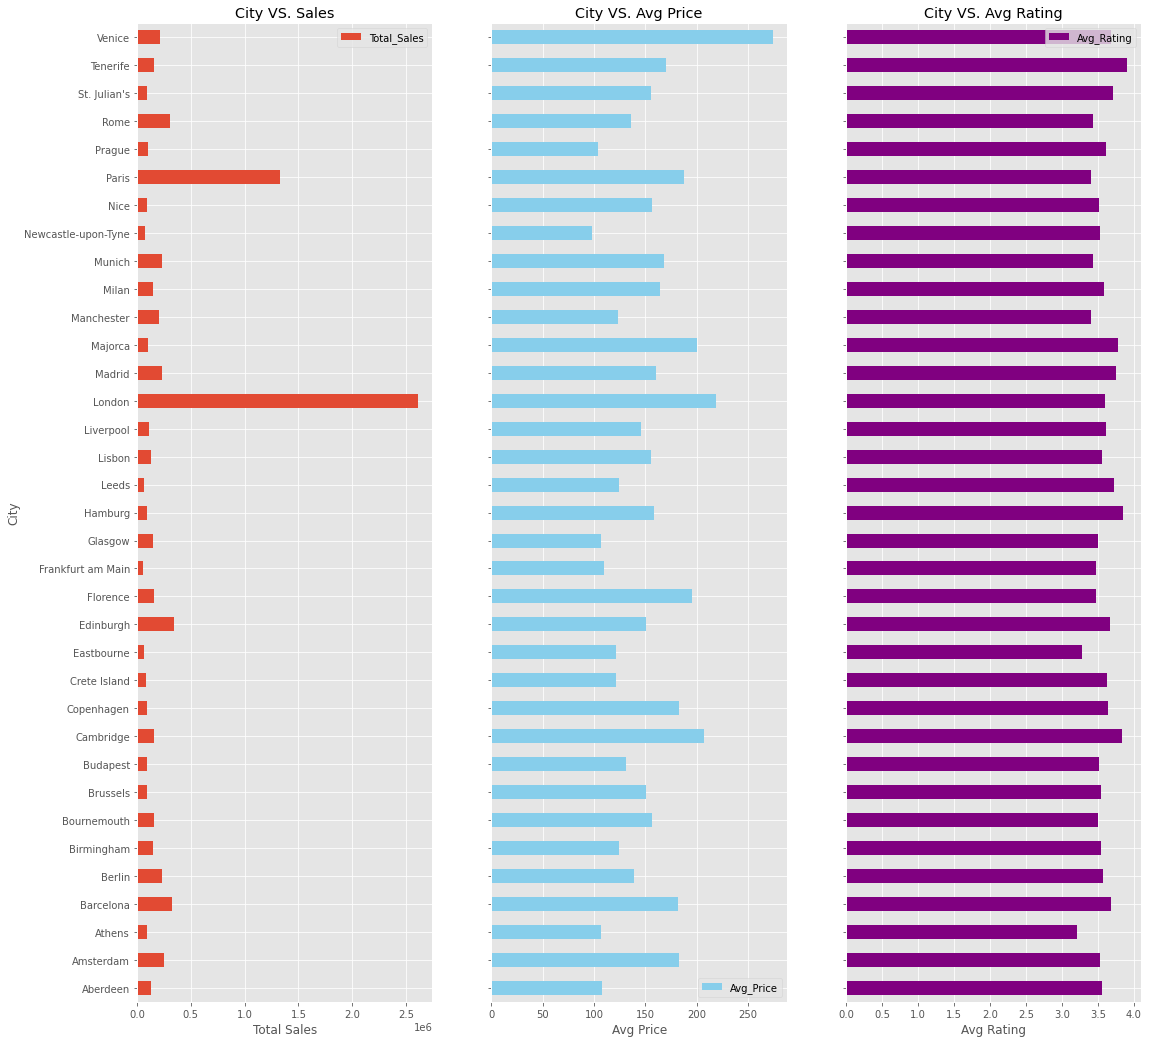

In [22]:
# Your code to answer Question 1
%matplotlib inline

comb_df = Order_details.merge(Property_details, how = "inner", left_on = "propertycode", right_on = "propertyid")
output1 = comb_df.groupby(by = "city").filter(lambda x: len(x) >= 500).groupby(by = "city").apply(lambda x: pd.Series({
    "Total_Sales":x["onsiteprice"].sum(),"Avg_Rating":x["starrating"].mean(), "Avg_Price":x["onsiteprice"].mean()
})).reset_index()


fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (18,18))
output1.plot(kind = "barh", x = "city", y = "Total_Sales", ax = ax0)
ax0.set(title = "City VS. Sales", xlabel = "Total Sales", ylabel = "City")

output1.plot(kind = "barh", x = "city", y = "Avg_Price", ax = ax1, color = "skyblue")
ax1.set(title = "City VS. Avg Price", xlabel = "Avg Price")

output1.plot(kind = "barh", x = "city", y = "Avg_Rating", ax = ax2, color = "purple")
ax2.set(title = "City VS. Avg Rating", xlabel = "Avg Rating")


[Text(0.5, 1.0, 'Type VS. Discounts'), Text(0.5, 0, 'Avg Discounts')]

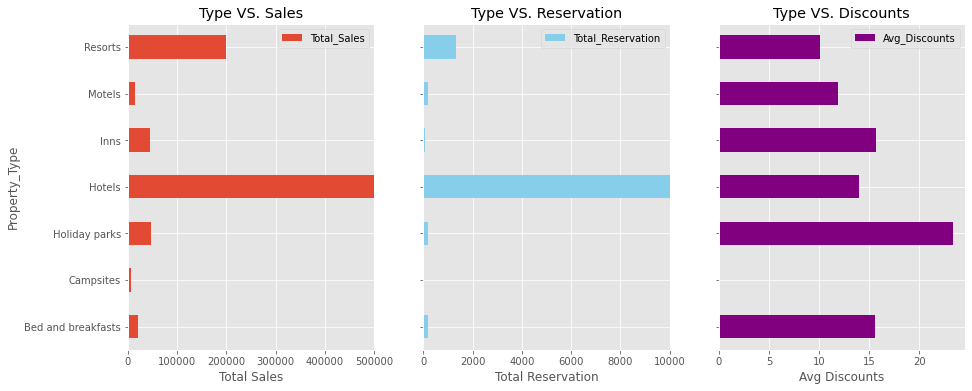

In [23]:
# Your code to answer Question 2
%matplotlib inline

output2 = comb_df.groupby(by = "propertytype").\
                  apply(lambda x: pd.Series({"Total_Sales":x["onsiteprice"].sum(),\
                                             "Total_Reservation": x.id.count(),\
                                             "Avg_Discounts":x.discount.mean()})).reset_index()

fig, (ax0,ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (15,6))
output2.plot(kind = "barh", x="propertytype", y = "Total_Sales", ax = ax0)
ax0.set_xlim([0,500000])
ax0.set(title = "Type VS. Sales", xlabel = "Total Sales", ylabel = "Property_Type")

output2.plot(kind = "barh", x="propertytype", y = "Total_Reservation", ax = ax1, color = "skyblue")
ax1.set_xlim([0,10000])
ax1.set(title = "Type VS. Reservation", xlabel = "Total Reservation")

output2.plot(kind = "barh", x="propertytype", y = "Avg_Discounts", ax = ax2, color = "purple")
ax2.set(title = "Type VS. Discounts", xlabel = "Avg Discounts")

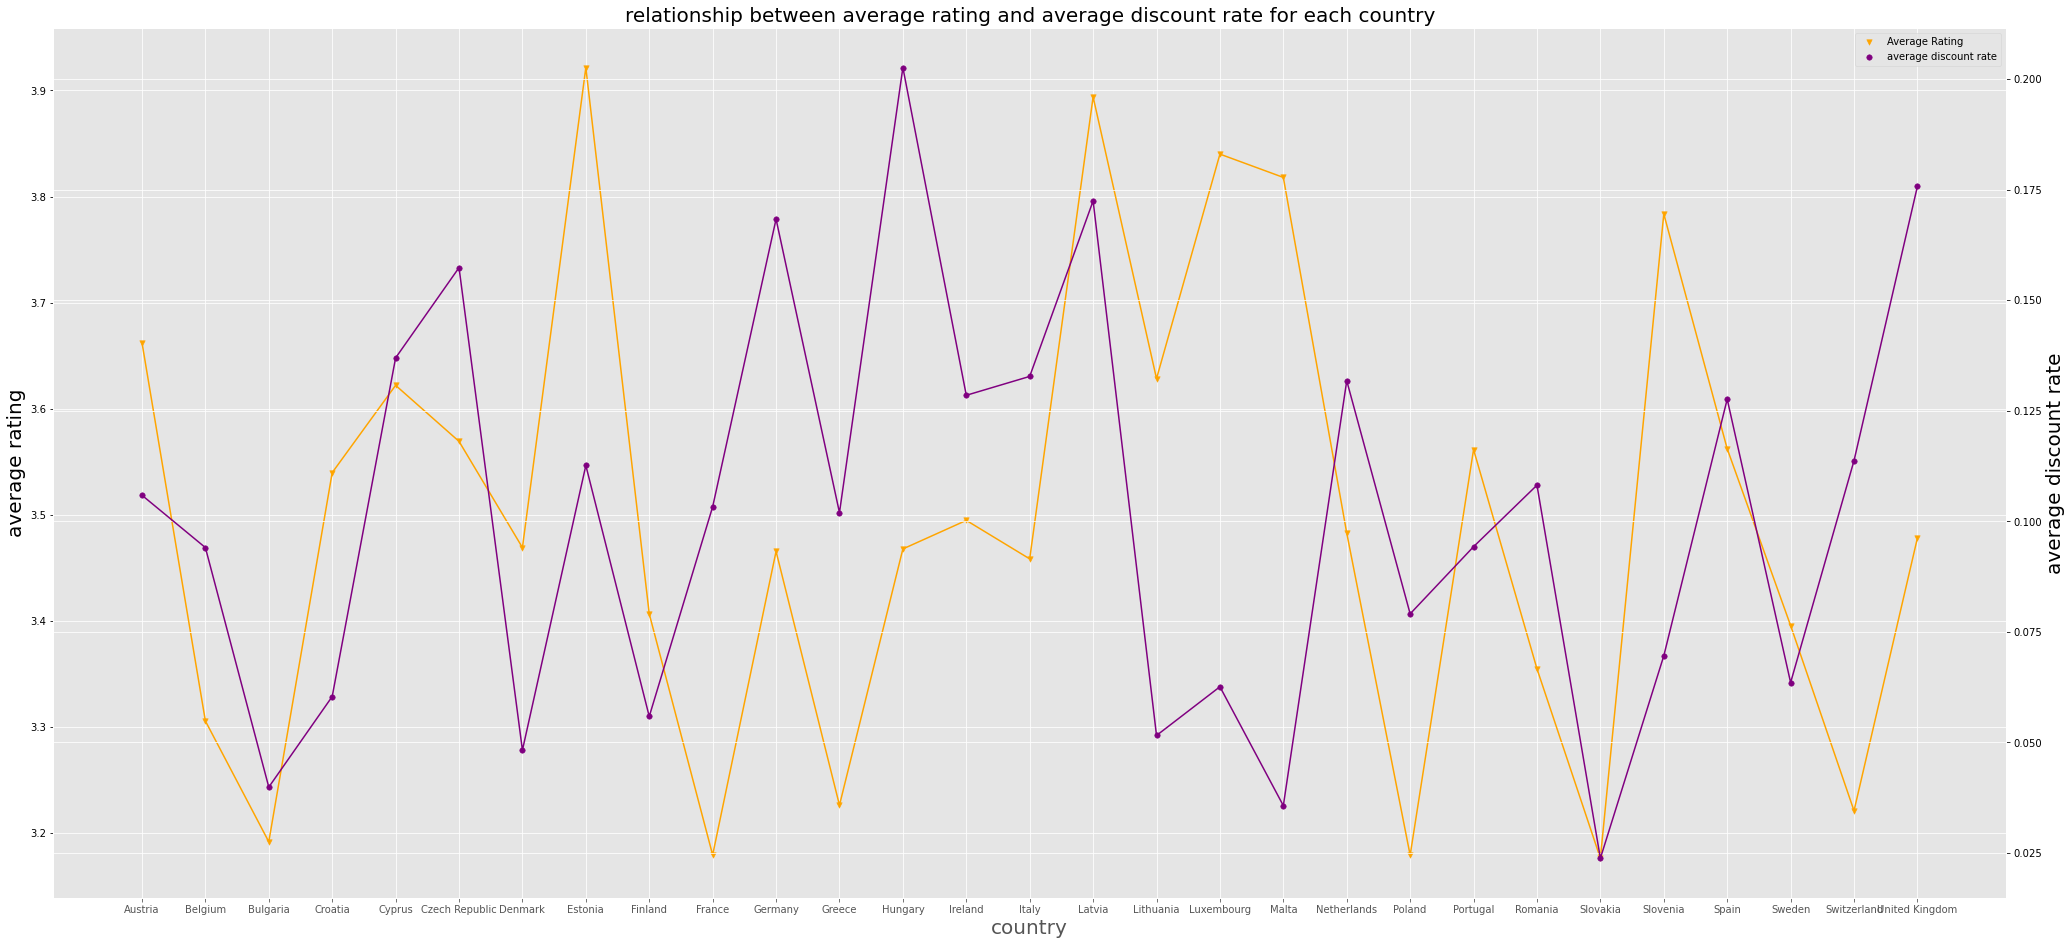

In [24]:
# Your code to answer Question 3
output3 = comb_df.groupby(by='country').apply(lambda x:pd.Series({'Average_rating':x.starrating.mean(),\
                                                                       'average discount_rate':(x.discount/x.onsiteprice).mean()})).reset_index()

fig, ax0 = plt.subplots(figsize = (35,16))
line1 = ax0.plot(output3["country"], output3["Average_rating"], color = "orange", label = "Average Rating")
p1 = ax0.scatter(output3["country"], output3["Average_rating"], color = "orange", marker = "v", \
                 s = 30, label = "Average Rating")

ax1 = ax0.twinx()
line2 = ax1.plot(output3["country"], output3["average discount_rate"], color = "purple", label = "Average discount rate")
p2 = ax1.scatter(output3["country"], output3["average discount_rate"], color = "purple", marker = "o", \
                 s = 30, label = "average discount rate")



ax0.set_xlabel("country",fontsize = 20)
ax0.set_ylabel("average rating",fontsize = 20)
ax1.set_ylabel("average discount rate",fontsize = 20)
ax0.set_title("relationship between average rating and average discount rate for each country",fontsize = 20)

ax0.yaxis.label.set_color("black")
ax1.yaxis.label.set_color("black")
ax0.tick_params(axis = 'y', colors = "black")
ax1.tick_params(axis = 'y', colors = "black")

plt.legend(handles = [p1,p2])
plt.show()

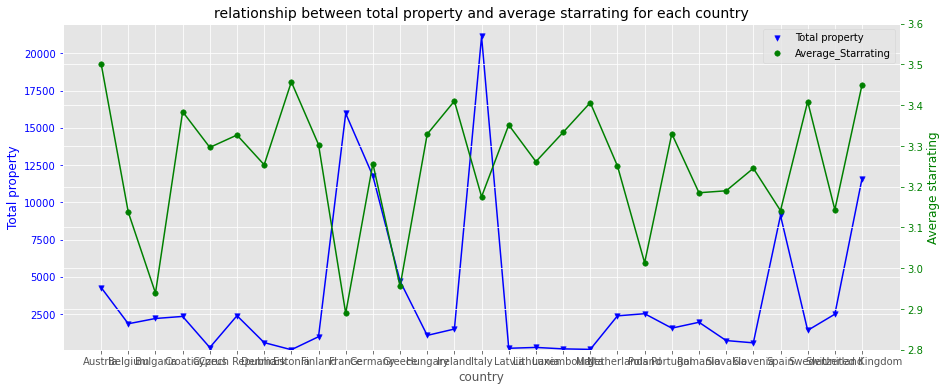

In [25]:
# Your code to answer Question 4
output4 = Property_details.groupby(by = "country").\
        apply(lambda x: pd.Series({"Total_number_of_property":x.propertyid.count(),\
                                  "Average_Starrating":x.starrating.mean()})).reset_index()

fig, ax0 = plt.subplots(figsize = (15,6))
line1 = ax0.plot(output4["country"], output4["Total_number_of_property"], color = "blue", label = "Total property")
p1 = ax0.scatter(output4["country"], output4["Total_number_of_property"], color = "blue", marker = "v", \
                 s = 30, label = "Total property")

ax1 = ax0.twinx()
line2 = ax1.plot(output4["country"], output4["Average_Starrating"], color = "green", label = "Average starrating")
p2 = ax1.scatter(output4["country"], output4["Average_Starrating"], color = "green", marker = "o", \
                 s = 30, label = "Average_Starrating")

ax0.set_ylim([100,22000])
ax1.set_ylim([2.8,3.6])

ax0.set_xlabel("country",fontsize = 12)
ax0.set_ylabel("Total property",fontsize = 12)
ax1.set_ylabel("Average starrating",fontsize = 12)
ax0.set_title("relationship between total property and average starrating for each country",fontsize = 14)

ax0.yaxis.label.set_color("blue")
ax1.yaxis.label.set_color("green")
ax0.tick_params(axis = 'y', colors = "blue")
ax1.tick_params(axis = 'y', colors = "green")

plt.legend(handles = [p1,p2])
plt.show()

<AxesSubplot:ylabel='month'>

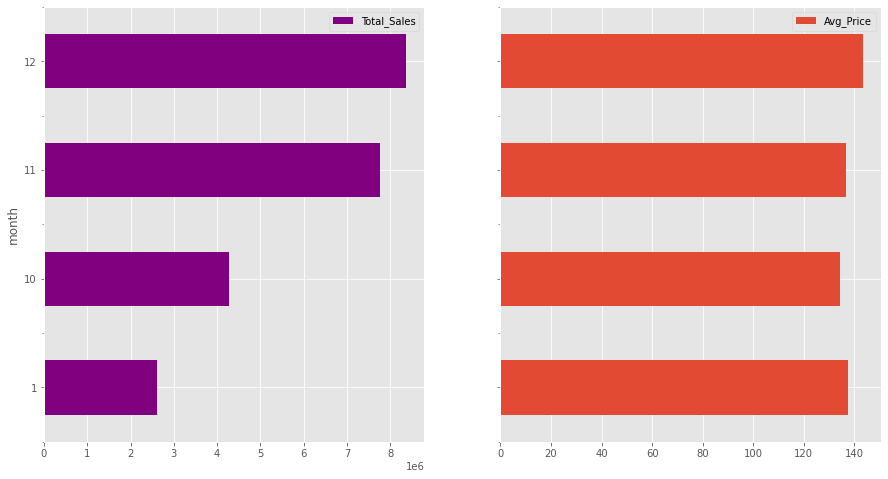

In [26]:
# Your code to answer Question 5
Order_details["month"] = Order_details["reservation date"].apply(lambda x: int(x.split("/")[0]))

output5 = Order_details.groupby("month").apply(lambda x: pd.Series({"Total_Sales": x["onsiteprice"].sum(), "Avg_Price":x["onsiteprice"].mean()})).reset_index()

fig,(ax0,ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8), sharey = True)
output5.plot(kind = "barh", x = "month", y = "Total_Sales", color = "purple", ax = ax0)
output5.plot(kind = "barh", x = "month", y = "Avg_Price", ax = ax1)

## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


PART 1 - Question Points: 
1a - 2 points;
1b - 1 point;
2a - 3 points;
2b - 2 points;
3a - 3 points;
3b - 1 point;
4a - 3 points;
4b - 4 points;
5a - 3 points;
5b - 3 points;
Bonus(a) - 1 point;
Bonus(b) - 1 point;

PART 2 - 
9 points total


Good Luck!

### Executive Summary:

We want to discover the relationship between each city's ratings, price, and sales for question one. We filter out cities with less than 500 because we want to see how these popular cities perform. There is no apparent relationship between popularity, ratings, and average price.

For question two, we want to see which type of property is the most popular one and why it is popular. Reservations and sales of hotels outperform other types, but hotels offer relatively moderate discounts, so hotels have other attributes than financial factors to attract customers.

For question three, we found that customers' higher or lower ratings will not guarantee to result in concessional effect (the hotel make concessions on prices to compensate their flaws on services to keep customers) and the effect vary by countries. The comment/rating of customer is not a deciding factor to affect hotel market price. 

For question four, we want to figure out that is there a competitor effect brought by competition by finding is there a relationship between total number of property and avergae starrating for each country. The competitor effect refers to the improvement brought by competition, which means the country with more property should have a higher star rating. There is no significant relationship between them, so we conclude that more competitors do not guarantee ratings better.

We want to discover sales differences in each month or period and what causes this difference for question five. Although we only have four months in the dataset, it is evident that December is the most popular month. Lower price is not the reason why December has much higher sales. However, it is reasonable to conclude that it is closer to New Year and people want to celebrate and travel.

(Word Count: 290)
